Name - Pragya Aryal
University ID - 2329229
FINAL PORTFOLIO


#Classification [Heart Failure Prediction]

Classification

Classification refers to putting things into different groups based on their features. It's like sorting objects into categories, such as sorting fruits by their colors or shapes. The computer learns from examples to predict which category new items belong to. It's used for tasks like identifying spam emails, recognizing animals, and predicting customer preferences.
Logistic Regression

Logistic Regression is a statistical technique for analyzing a dataset in which one or more independent variables influence the outcome. It is used for binary classification problems, where the target variable can take one of only two possible values, such as "yes" or "no", or "pass" or "fail".

## Choose,  Load,  Inspect, and Explore the Data.

 Here, in this task I have used dataset called "Heart failure Prediction" which is used to predict whether a patient is likely to develop heart failure based on a set of risk factors.


Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np # linear algebra

# import libraries for plotting
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Final AI portfolio/Heart.csv')

In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data Understanding, Cleaning and Transformation

  1. Data Understanding


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
#Fetching Dimensions of The Dataset
num_rows, num_cols = df.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)

Number of Rows: 299
Number of Columns: 13


In [9]:
# Display unique values and data types of attributes
unique_values = df.nunique()
data_types = df.dtypes

print("Unique Values:")
print(unique_values)
print("\nData Types:")
print(data_types)

Unique Values:
age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Data Types:
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

2. Data Cleaning
The process of detecting and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It's an important step in the data preparation process that ensures the data is ready for analysis and modeling. It is required because real-world datasets are frequently messy, with missing values, duplicates, incorrect values, outliers, and other types of errors.

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## Data Analysis and Visualization

The process of evaluating and interpreting data in order to extract insights, draw conclusions, and support decision making is known as data analysis. It involves cleaning, processing, and modeling data using mathematical and statistical methods, algorithms, and software tools.


In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000



Boolean features


Boolean is a data type that has only two values. In this case, some features only have two values, namely 0 and 1, these features include anemia, diabetes, high_blood_preassure, sex, smooking, and DEATH_EVENT

Smoking column

In [13]:
df['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

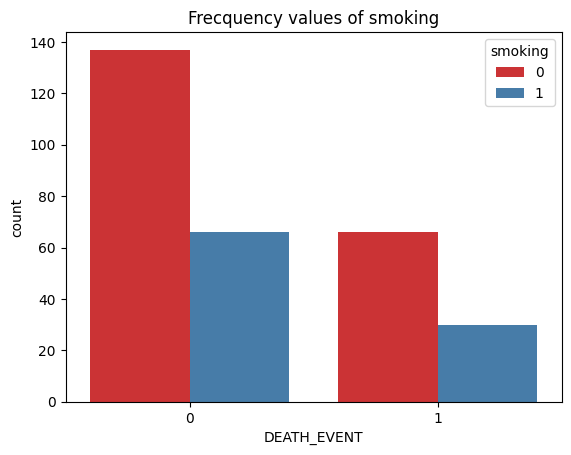

In [14]:
sns.countplot(x ='DEATH_EVENT', hue = "smoking", data = df, palette = "Set1")
plt.title('Frecquency values of smoking')
plt.show()


The bar graph shows the number of people who died (DEATH_EVENT) categorized by whether they smoked or not. More people who smoked died than those who did not smoke.

 It is important to note that correlation does not equal causation, so we cannot determine from this graph whether smoking caused the deaths.

Age analysis

<Axes: xlabel='age', ylabel='Density'>

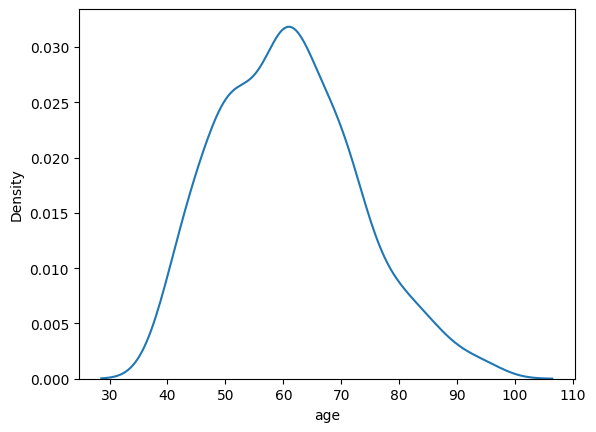

In [15]:
sns.kdeplot(df['age'])

Sex Column

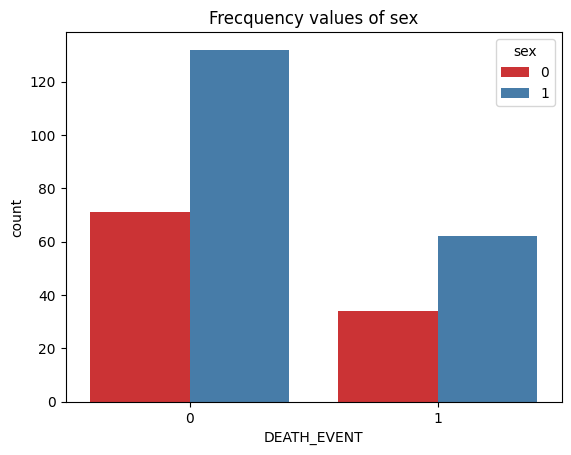

In [16]:
sns.countplot(x ='DEATH_EVENT', hue = "sex", data = df, palette = "Set1")
plt.title('Frecquency values of sex')
plt.show()

In the visualization above, the frequency of someone who dies is more female than male, as well as the frequency of someone who does not die is more female.

Anemia Columns

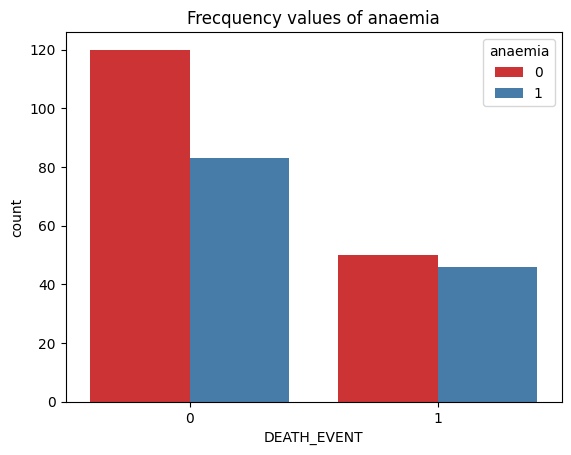

In [17]:
sns.countplot(x ='DEATH_EVENT', hue = "anaemia", data = df, palette = "Set1")
plt.title('Frecquency values of anaemia')
plt.show()

In the visualization above, overall it is known that the comparison between someone who has reduced hemoglobin (anemia) or not tends to be more who do not die compared to those who do. Meanwhile, for the frequency of someone who died, more people did not experience a decrease in hemoglobin (anemia), as well as for the frequency of someone who did not die, there were more people who did not experience a decrease in hemoglobin (anemia).

Diabetes Columns

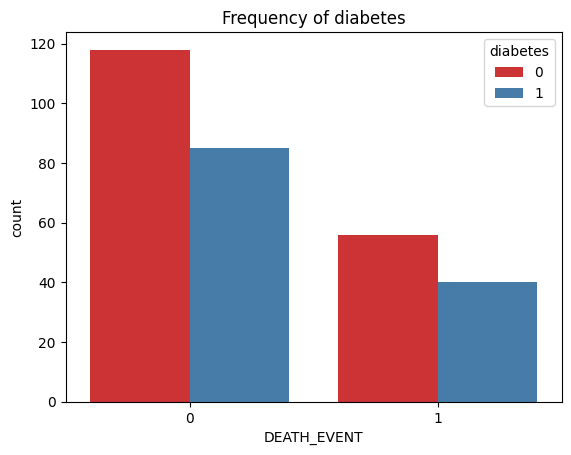

In [18]:
sns.countplot(x='DEATH_EVENT', hue='diabetes', data=df, palette='Set1')
plt.title('Frequency of diabetes')
plt.show()

In the visualization above, overall it is known that the comparison between someone who has diabetes or not tends to be more who do not die compared to those who do. Meanwhile, the frequency of someone who died was more who did not have diabetes, as well as for the frequency of someone who did not die, there were more people who did not have diabetes.

high_blood_pressure Column

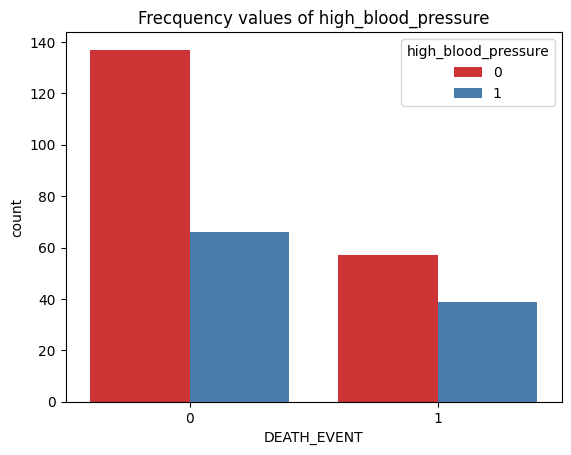

In [19]:
sns.countplot(x ='DEATH_EVENT', hue = "high_blood_pressure", data = df, palette = "Set1")
plt.title('Frecquency values of high_blood_pressure')
plt.show()

In the visualization above, as a whole it is known that the comparison between someone who has high blood pressure or not tends to be more who do not die compared to those who do. Meanwhile, for the frequency of people who died, there were more people who did not have high blood pressure, as well as for the frequency of people who did not die, there were more people who did not have high blood pressure.

Death_Event column

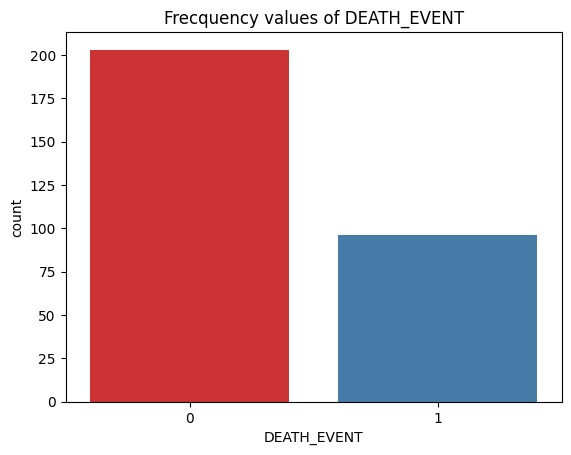

In [20]:
sns.countplot(x = 'DEATH_EVENT', data = df, palette = 'Set1')
plt.title('Frecquency values of DEATH_EVENT')
plt.show()

In the visualization above, it can be seen that the DEATH_EVENT column shows imbalanced data. Imbalanced itself is a situation where the distribution of data classes is unbalanced, the number of data classes (instances) is one less or more than the number of other data classes. Next, we will do the handling so that the data becomes balanced.

Boxplots for visualization


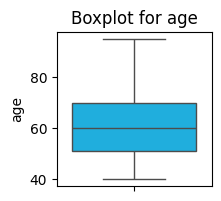

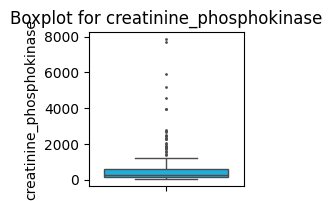

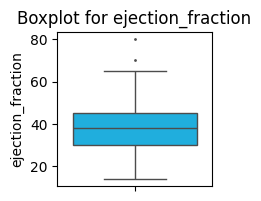

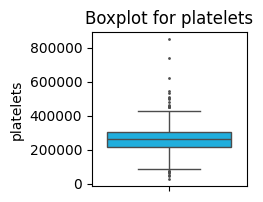

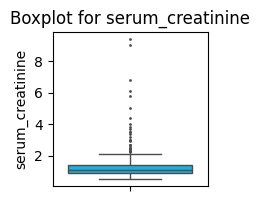

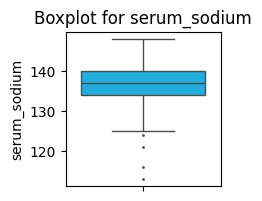

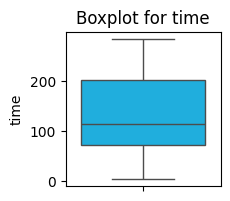

In [21]:
# Iterate over numerical columns to create histograms with KDE plots and boxplots for visualization

num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:
    # Create a new figure for each iteration
    fig, axs = plt.subplots(figsize=(2, 2))

    # Plot a boxplot for the current numerical column
    sns.boxplot(df[i], color='#00befd', fliersize=1)

    # Set title for the boxplot
    plt.title('Boxplot for ' + i)

    # Show the plot
    plt.show()

Data Processing

In [22]:
data1 = ['creatinine_phosphokinase']
for num_col in data1:
    q1 = df[num_col].quantile(0.25)
    q3 = df[num_col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[num_col] = np.where(df[num_col]>upper_limit,upper_limit ,
                      np.where(df[num_col]<lower_limit,lower_limit, df[num_col]))

In [23]:
data2 = ['ejection_fraction']
for num_col in data1:
    q1 = df[num_col].quantile(0.25)
    q3 = df[num_col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[num_col] = np.where(df[num_col]>upper_limit,upper_limit ,
                      np.where(df[num_col]<lower_limit,lower_limit, df[num_col]))

In [24]:
data3 = ['platelets']
for num_col in data1:
    q1 = df[num_col].quantile(0.25)
    q3 = df[num_col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[num_col] = np.where(df[num_col]>upper_limit,upper_limit ,
                      np.where(df[num_col]<lower_limit,lower_limit, df[num_col]))

In [25]:
data4 = ['serum_creatinine']
for num_col in data1:
    q1 = df[num_col].quantile(0.25)
    q3 = df[num_col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[num_col] = np.where(df[num_col]>upper_limit,upper_limit ,
                      np.where(df[num_col]<lower_limit,lower_limit, df[num_col]))

In [26]:
data5 = ['serum_sodium']
for num_col in data1:
    q1 = df[num_col].quantile(0.25)
    q3 = df[num_col].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    df[num_col] = np.where(df[num_col]>upper_limit,upper_limit ,
                      np.where(df[num_col]<lower_limit,lower_limit, df[num_col]))

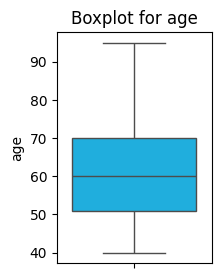

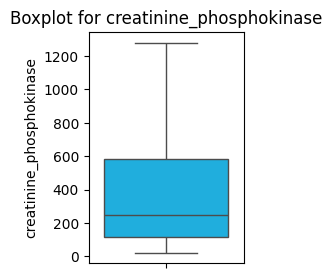

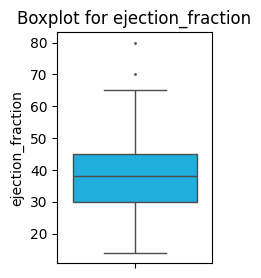

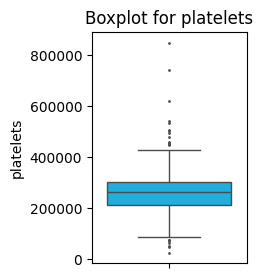

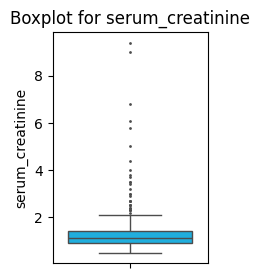

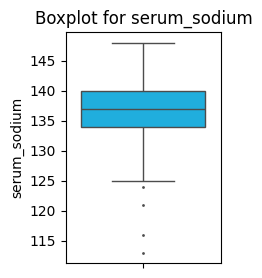

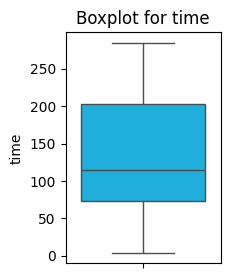

In [27]:
## After handling outliers
# Detecting outliers
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:
    # Create a new figure for each iteration
    fig, axs = plt.subplots(figsize=(2, 3))

    # Plot a boxplot for the current numerical column
    sns.boxplot(df[i], color='#00befd', fliersize=1)

    # Set title for the boxplot
    plt.title('Boxplot for ' + i)

    # Show the plot
    plt.show()

In [28]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.086870,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.214201,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.086870,-0.214201,1.000000,0.011575,-0.042176,-0.077600,0.000274,-0.040717,0.004547,0.043623,-0.033310,0.114641,-0.006355
diabetes,-0.101012,-0.012729,0.011575,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.042176,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.077600,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.000274,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.040717,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.004547,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.043623,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation Heatmap of Heart Failure Prediction'}>

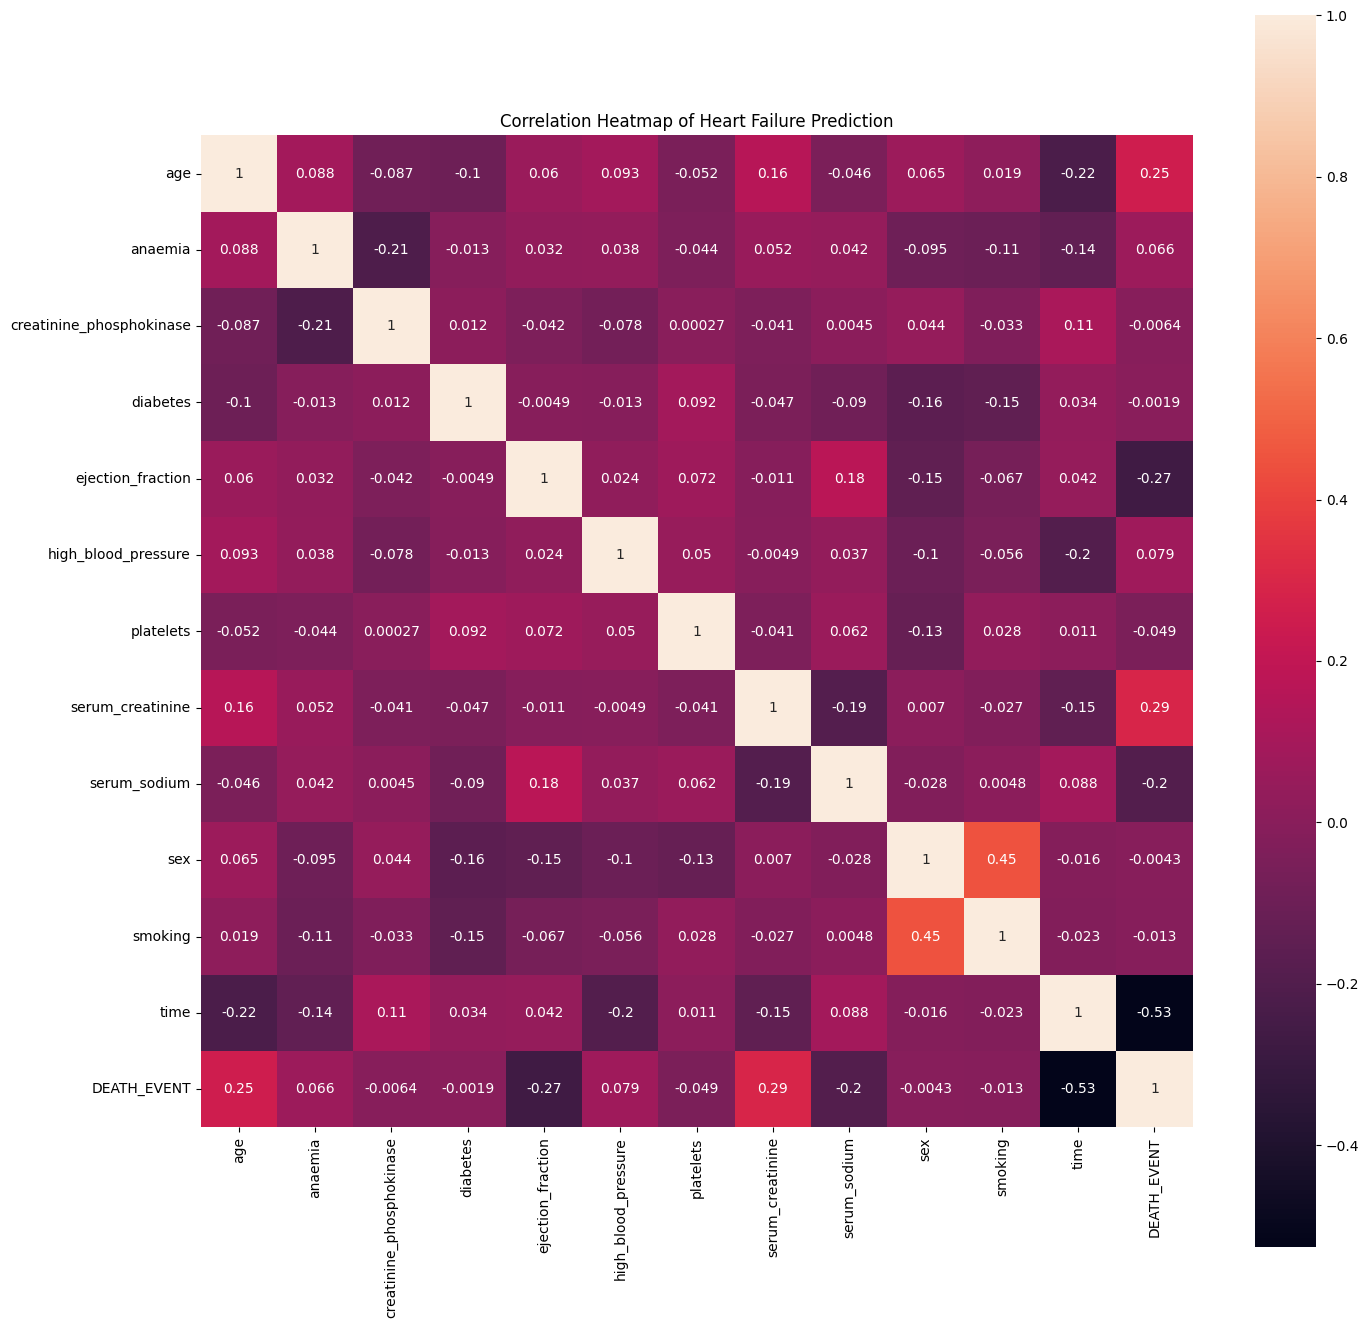

In [29]:
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of Heart Failure Prediction')
fig.set_size_inches((16,16))
sns.heatmap(df.corr(), square = True, annot = True)

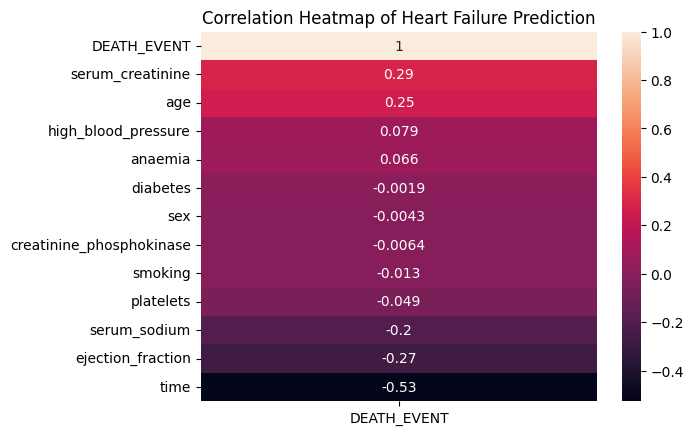

In [30]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

## Build Model  


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [39]:
data = df.copy()

In [40]:
X = df.drop(columns=['DEATH_EVENT', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex'])  # Features
y = df['DEATH_EVENT']  # Target variable


In [41]:
# Explore the dataset
print(X.head())
print(y.head())


    age  creatinine_phosphokinase  ejection_fraction  platelets  \
0  75.0                    582.00                 20  265000.00   
1  55.0                   1280.25                 38  263358.03   
2  65.0                    146.00                 20  162000.00   
3  50.0                    111.00                 20  210000.00   
4  65.0                    160.00                 20  327000.00   

   serum_creatinine  serum_sodium  time  
0               1.9           130     4  
1               1.1           136     6  
2               1.3           129     7  
3               1.9           137     7  
4               2.7           116     8  
0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64


Splitting database

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier

In [43]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
decision_tree_predict = clf_dt.predict(X_test)

Evaluating Decision Tree Classifier on Test dataset

Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.80      0.76        35
           1       0.67      0.56      0.61        25

    accuracy                           0.70        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.70      0.70      0.70        60

Confusion Matrix:
 [[28  7]
 [11 14]]


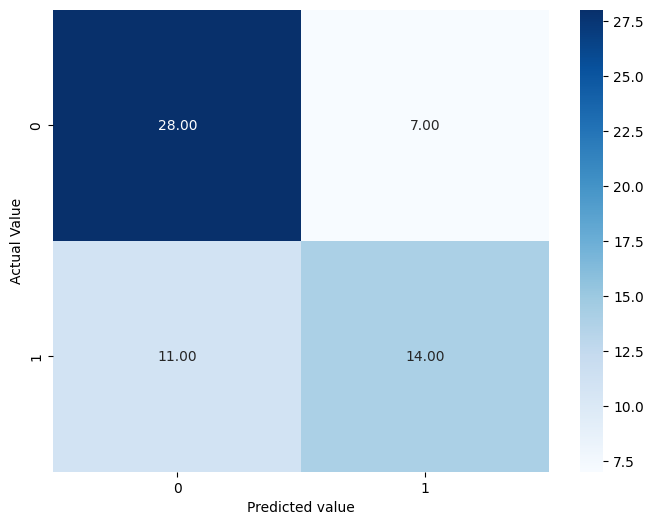

In [45]:
# Calculate accuracy
d_accuracy = accuracy_score(y_test, decision_tree_predict)
print(f"Accuracy: {d_accuracy:.2f}")

# Generate a classification report
d_class_report = classification_report(y_test, decision_tree_predict)
print("Classification Report:\n", d_class_report)

# Generate a confusion matrix
d_conf_matrix = confusion_matrix(y_test, decision_tree_predict)
print("Confusion Matrix:\n", d_conf_matrix)
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(d_conf_matrix, annot=True , fmt=".2f",cmap="Blues")
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.show()

Random Forest Classifier

In [46]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
random_forest_predict = clf_rf.predict(X_test)

Evaluating Random Forest Classifier on Test dataset

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60

Confusion Matrix:
 [[31  4]
 [13 12]]


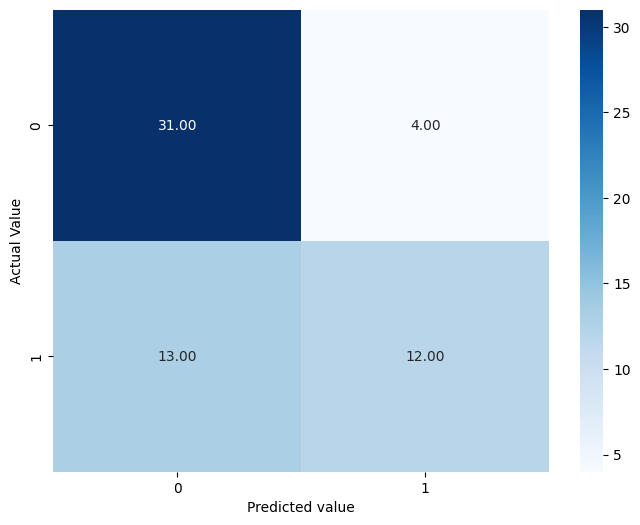

In [48]:
# Calculate accuracy
r_accuracy = accuracy_score(y_test, random_forest_predict)
print(f"Accuracy: {r_accuracy:.2f}")

# Generate a classification report
r_class_report = classification_report(y_test, random_forest_predict)
print("Classification Report:\n", r_class_report)

# Generate a confusion matrix
r_conf_matrix = confusion_matrix(y_test, random_forest_predict)
print("Confusion Matrix:\n", r_conf_matrix)

# Plotting the confusion matrix as a heatmap
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(r_conf_matrix, annot=True , fmt=".2f",cmap="Blues")
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.show()

## Hyper-parameter Optimization with Cross-Validation

HyperParameter Tuning for Decision Tree Classifier

In [49]:
#grid search cv
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_dt = GridSearchCV(clf_dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)
# Print the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters:")
print(best_params_dt)

# Get the best estimator (model) from GridSearchCV
best_clf_dt = grid_search_dt.best_estimator_
y_pred = best_clf_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7166666666666667


HyperParameter Tuning for Random forest Classifier

In [50]:
# Define hyperparameter grid for GridSearchCV
param_grid_rf = [
    {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
    }
]

# Perform hyperparameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(clf_rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters:")
print(best_params_rf)

# Get the best estimator (model) from GridSearchCV
best_clf_rf = grid_search_rf.best_estimator_
y_pred = best_clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.7


##Feature Selection

In [51]:
from sklearn.feature_selection import RFE

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Create RFE model and select top 'n' features
rfe = RFE(dt_model, n_features_to_select=5)  # You can adjust the number of features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_dt = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features for Decision Tree Classifier:")
print(selected_features_dt)

# Use only the selected features for training and testing
X_train_dt_selected = X_train[selected_features_dt]
X_test_dt_selected = X_test[selected_features_dt]


Selected Features for Decision Tree Classifier:
Index(['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'time'],
      dtype='object')


Feature Selection for Random Forest Classifier

In [52]:
from sklearn.feature_selection import RFE

# Create a Logistic Regression model
rf_model = RandomForestClassifier()

# Create RFE model and select top 'n' features
rfe = RFE(rf_model, n_features_to_select=5)  # You can adjust the number of features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rf = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features for Random Forest Classifier:")
print(selected_features_rf)

# Use only the selected features for training and testing
X_train_rf_selected = X_train[selected_features_rf]
X_test_rf_selected = X_test[selected_features_rf]


Selected Features for Random Forest Classifier:
Index(['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time'], dtype='object')


## Final Model

Decision Tree classifier

In [53]:
# Decision TreeClassifier with selected features
dt_model_selected = DecisionTreeClassifier(**best_params_dt)
dt_model_selected.fit(X_train_dt_selected, y_train)


DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [54]:
# Rebuilding Decision Tree Classifier with best hyperparameters and selected features
final_dt_model = DecisionTreeClassifier(

    criterion=best_params_dt['criterion'],
    max_depth=best_params_dt['max_depth'],
    min_samples_split=best_params_dt['min_samples_split'],
    min_samples_leaf=best_params_dt['min_samples_leaf']
)

# Train the model on the training data with selected features
final_dt_model.fit(X_train_dt_selected, y_train)

# Make predictions on the test set
y_pred_dt_final = final_dt_model.predict(X_test_dt_selected)

# Evaluate the model performance
accuracy_dt_final = accuracy_score(y_test, y_pred_dt_final)
print("Accuracy of Decision Tree Classifier on Test Set:", accuracy_dt_final)

# Confusion Matrix
cm_dt_final = confusion_matrix(y_test, y_pred_dt_final, normalize='all')
print("Confusion Matrix - Decision Tree Classifier:")
print(cm_dt_final)

# Classification Report
report_dt_final = classification_report(y_test, y_pred_dt_final)
print("Classification Report - Decision Tree Classifier:")
print(report_dt_final)

Accuracy of Decision Tree Classifier on Test Set: 0.7666666666666667
Confusion Matrix - Decision Tree Classifier:
[[0.5        0.08333333]
 [0.15       0.26666667]]
Classification Report - Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.76      0.64      0.70        25

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.75        60
weighted avg       0.77      0.77      0.76        60



ROC AUC Score: 0.7485714285714287


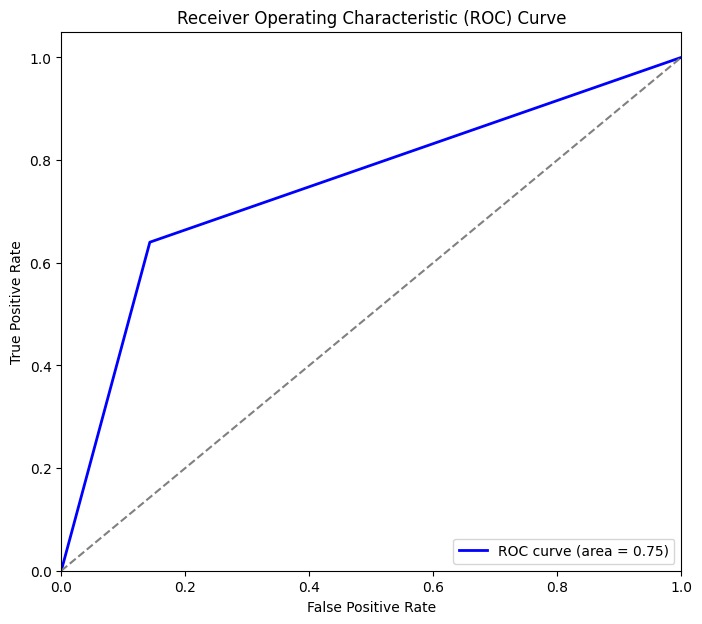

In [55]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_final)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model with your desired hyperparameters
final_rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features='sqrt')

# Train the Random Forest model using your training data
final_rf.fit(X_train_rf_selected, y_train)


RandomForestClassifier(max_depth=20, min_samples_split=5)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Rebuilding Random Forest with best hyperparameters and selected features
final_rf = RandomForestClassifier(**best_params_rf)

# Fit the model to the training data
final_rf.fit(X_train_rf_selected, y_train)

# Make predictions on the test set
y_pred_rf_final = final_rf.predict(X_test_rf_selected)

# Evaluate the model performance
accuracy_rf_final = accuracy_score(y_test, y_pred_rf_final)
print("Accuracy of random forest classifier on Test Set:", accuracy_rf_final)

# Confusion Matrix
cm_rf_final = confusion_matrix(y_test, y_pred_rf_final, normalize='all')
print("Confusion Matrix - Random Forest Classifier:")
print(cm_rf_final)

# Classification Report
report_rf_final = classification_report(y_test, y_pred_rf_final, zero_division=1)
print("Classification Report - Random Forest Classifier:")
print(report_rf_final)


Accuracy of random forest classifier on Test Set: 0.7166666666666667
Confusion Matrix - Random Forest Classifier:
[[0.51666667 0.06666667]
 [0.21666667 0.2       ]]
Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        35
           1       0.75      0.48      0.59        25

    accuracy                           0.72        60
   macro avg       0.73      0.68      0.69        60
weighted avg       0.72      0.72      0.70        60



ROC AUC Score: 0.6828571428571428


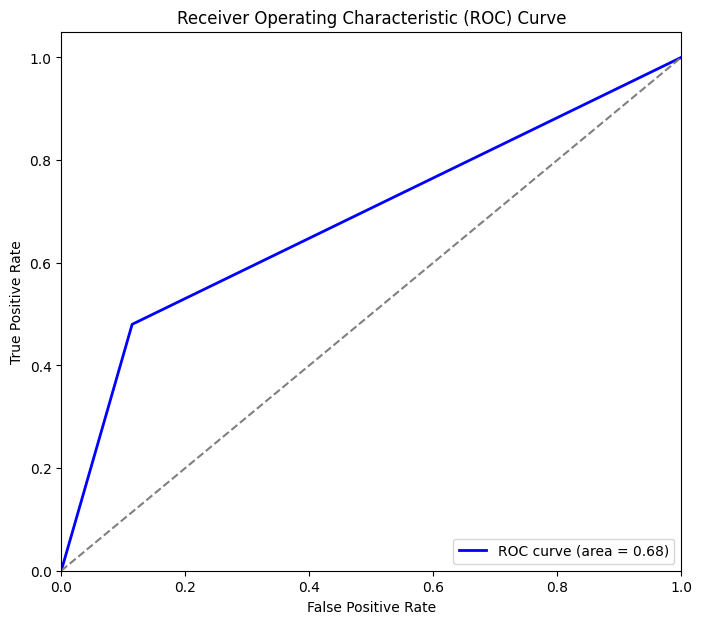

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_final)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Decision Tree ROC AUC Score: 0.7485714285714287
Random Forest ROC AUC Score: 0.6828571428571428


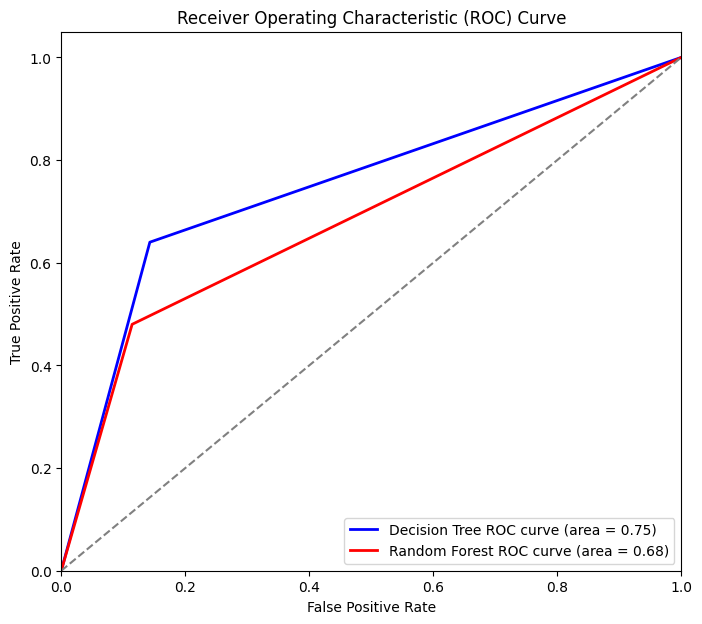

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt_final)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print("Decision Tree ROC AUC Score:", roc_auc_dt)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_final)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("Random Forest ROC AUC Score:", roc_auc_rf)

# Plot ROC curve for both models
plt.figure(figsize=(8, 7))

# Plot ROC curve for Decision Tree
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt)

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the combined ROC curve graph
plt.show()


##Conclusion




In this analysis, we explored the performance of Decision Tree and Random Forest classifiers in predicting the risk of death events based on various clinical features. Initially, we split the dataset into training and testing sets, then trained and evaluated both classifiers. Subsequently, we performed hyperparameter tuning using GridSearchCV to optimize the models' performance. After tuning, we evaluated the models again and observed improvements in accuracy.

Furthermore, we conducted feature selection using Recursive Feature Elimination (RFE) to identify the most influential features for each classifier. The selected features were used to train the final models. The final evaluation showed that the Decision Tree classifier achieved an accuracy of 76.67% on the test set, while the Random Forest classifier achieved an accuracy of 71.67%. Additionally, we visualized the Receiver Operating Characteristic (ROC) curves for both models and calculated the area under the curve (AUC) to assess their predictive performance.

In conclusion, the Decision Tree classifier outperformed the Random Forest classifier in terms of accuracy and overall predictive capability for the given dataset. However, further refinement and exploration may be necessary to improve the models' performance and robustness for real-world applications.